In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def read_file(file_name, speic_name):
    hist = []
    hist_temp = []
    hist_conv = []
    hist_count = []
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == 'Time':
                if hist_count != [] and hist_conv != []:
                    hist_temp.append(hist_count) 
                    hist_temp.append(hist_conv) 
                    hist.append(hist_temp)
                hist_count = []
                hist_conv = []
                hist_temp = []
                hist_temp.append(float(line.strip('Time (s): ')))
            else:
                string = '	' + str(speic_name) + ': '
                line = line.strip('. \n').split(string)
                if len(line) != 2:
                    print('Wrong species name!')
                    return 0
                else: 
                    hist_count.append(int(line[0]))
                    hist_conv.append(int(line[1]))
            hist_temp.append(hist_count) 
            hist_temp.append(hist_conv) 
            hist.append(hist_temp)
        return hist

In [30]:
# def hist_period(file_name, speic_name):
#     t_i = 0.9
#     t_f = 1
#     hist = read_file(file_name, speic_name)
#     plot_count = []
#     plot_conv = []
#     tot = 0
#     for i in hist:
#         if t_i <= i[0] <= t_f:
#             tot += 1
#             for j in i[2]:
#                 if j not in plot_conv:
#                     plot_conv.append(j)
#                     plot_count.append(i[1][i[2].index(j)])
#                 else:
#                     index = plot_conv.index(j)
#                     plot_count[index] += i[1][i[2].index(j)]
#     plot_count_mean = []                
#     for i in plot_count:
#         plot_count_mean.append(i/tot)
#     print('Start time(s): ', t_i)
#     print('End time(s): ', t_f)
#     print('Occurring convergence: ', plot_conv)
#     print('Occurring probabilities: ', plot_count_mean)
#     plt.bar(plot_conv, plot_count_mean)
#     plt.title('Histogram over a Certian Time Period')
#     plt.xlabel('# of Clathrin')
#     plt.ylabel('Count')
#     plt.show()
    
# if __name__ == '__main__':
#     hist_period('histogram_complexes_time.dat', 'clat')

In [31]:
# def hist_max_old(file_name):
#     t_i = 0
#     t_f = 1
#     hist = read_file(file_name)
#     plot_time = []
#     plot_conv = []
#     for i in hist:
#         if t_i <= i[0] <= t_f:
#             plot_time.append(i[0])
#             plot_conv.append(max(i[2]))
#     plt.plot(plot_time, plot_conv)
#     plt.title('Maximum # of Clathrin in Single Molecule')
#     plt.xlabel('Time')
#     plt.ylabel('Max Number of Clathrin')
#     plt.show()
            
# if __name__ == '__main__':
#     hist_max_old('histogram_complexes_time.dat')          

In [32]:
# def hist_mean_old(file_name):
#     t_i = 0
#     t_f = 1
#     hist = read_file(file_name)
#     plot_time = []
#     plot_conv = []
#     for i in hist:
#         if t_i <= i[0] <= t_f:
#             plot_time.append(i[0])
#             plot_conv.append(np.mean(i[2]))
#     plt.plot(plot_time, plot_conv)
#     plt.title('Mean # of Clathrin in Single Molecule')
#     plt.xlabel('Time')
#     plt.ylabel('Mean # of Clathrin')
#     plt.show()
            
# if __name__ == '__main__':
#     hist_mean_old('histogram_complexes_time.dat')          

In [33]:
def time_valid(file_name, t_i, t_f, speic_name):
    hist = read_file(file_name, speic_name)
    min_time = hist[0][0]
    max_time = hist[-1][0]
    if t_i == -1 and t_f == -1:
        return min_time, max_time 
    elif min_time <= t_i <= max_time and t_i <= t_f <= max_time:
        return t_i, t_f
    else:
        print('Wrong input time period!')
        return -1.0, -1.0

Start time(s):  0.9
End time(s):  1.0
Occurring # of clathrin:  [59, 1, 40, 60]
Occurring probabilities:  [0.8149519804155421, 0.8149519804155421, 1.0, 0.18504801958445796]


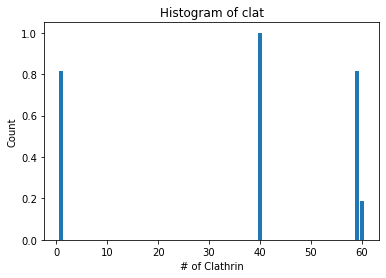

Start time(s):  0.8
End time(s):  1.0
Occurring # of clathrin:  [7, 9, 8, 12, 5]
Occurring probabilities:  [1.926609020055815, 5.0, 3.0, 1.073390979944185, 0.926609020055815]


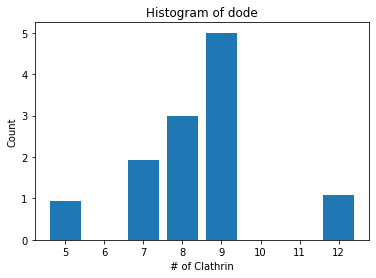

In [35]:
def hist(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_count = []
        plot_conv = []
        tot = 0
        for i in hist:
            if t_i <= i[0] <= t_f:
                tot += 1
                for j in i[2]:
                    if j not in plot_conv:
                        plot_conv.append(j)
                        plot_count.append(i[1][i[2].index(j)])
                    else:
                        index = plot_conv.index(j)
                        plot_count[index] += i[1][i[2].index(j)]
        plot_count_mean = []                
        for i in plot_count:
            plot_count_mean.append(i/tot)
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        print('Occurring # of clathrin: ', plot_conv)
        print('Occurring probabilities: ', plot_count_mean)
        plt.bar(plot_conv, plot_count_mean)
        plt.title('Histogram of ' + str(speic_name))
        plt.xlabel('# of Clathrin')
        plt.ylabel('Count')
        plt.show()
        return 0
    else:
        return 0
    
if __name__ == '__main__':
    hist('histogram_complexes_time_clat.dat', 0.9, 1.0, 'clat')
    hist('histogram_complexes_time_dode.dat', 0.8, 1.0, 'dode')

Start time(s):  0.0
End time(s):  1.0


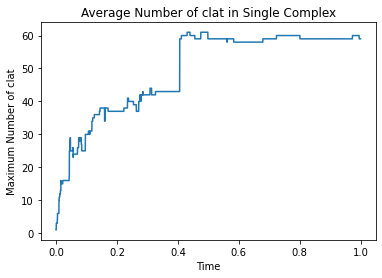

Start time(s):  0.0
End time(s):  1.0


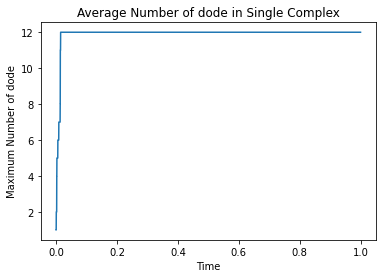

In [37]:
def max_complex(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_time = []
        plot_conv = []
        for i in hist:
            if t_i <= i[0] <= t_f:
                plot_time.append(i[0])
                plot_conv.append(max(i[2]))
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        plt.plot(plot_time, plot_conv)
        plt.title('Average Number of ' + str(speic_name) + ' in Single Complex')
        plt.xlabel('Time')
        plt.ylabel('Maximum Number of ' + str(speic_name))
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    max_complex('histogram_complexes_time_clat.dat', 0.0, 1.0, 'clat')
    max_complex('histogram_complexes_time_dode.dat', 0.0, 1.0, 'dode')

Start time(s):  0
End time(s):  0.5
Exclude Monomers:  True


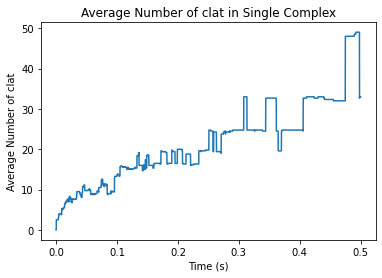

Start time(s):  0
End time(s):  0.5
Exclude Monomers:  True


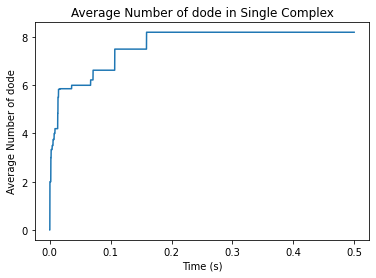

In [39]:
def mean_complex(file_name, t_i, t_f, speic_name, ExcludeMono = False):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_time = []
        plot_conv = []
        if not ExcludeMono:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    plot_time.append(i[0])
                    plot_conv.append(np.mean(i[2]))
        else:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    count = 1
                    N = 0
                    temp_sum = 0
                    plot_time.append(i[0])
                    while count <= len(i[1]):
                        if i[2][count-1] != 1:
                            temp_sum += i[2][count-1]
                            N += 1
                        if count == len(i[1]):
                            if N != 0:
                                plot_conv.append(temp_sum/N)
                            else:
                                plot_conv.append(0)
                        count += 1
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        print('Exclude Monomers: ', ExcludeMono)
        plt.plot(plot_time, plot_conv)
        plt.title('Average Number of ' + str(speic_name) + ' in Single Complex')
        plt.xlabel('Time (s)')
        plt.ylabel('Average Number of ' + str(speic_name))
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    mean_complex('histogram_complexes_time_clat.dat', 0, 0.5, 'clat', True)
    mean_complex('histogram_complexes_time_dode.dat', 0, 0.5, 'dode', True)

In [ ]:
def read_file_all(file_name, ):
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == 'Time':
                if hist_count != [] and hist_conv != []:
                    hist_temp.append(hist_count) 
                    hist_temp.append(hist_conv) 
                    hist.append(hist_temp)
                hist_count = []
                hist_conv = []
                hist_temp = []
                hist_temp.append(float(line.strip('Time (s): ')))
            else:
                line = line.strip('. \n').split('	clat: ')
                hist_count.append(int(line[0]))
                hist_conv.append(int(line[1]))
        hist_temp.append(hist_count) 
        hist_temp.append(hist_conv) 
        hist.append(hist_temp)
    return hist

read_file_all('histogram_complexes_time_2_comp.dat')